In [1]:
import torch

Simple linear function and predicitions for x value.

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
def forward(x):  
    y = w*x + b
    return y

In [4]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

# Linear Class

In [5]:
from torch.nn import Linear

In [6]:
# random value for Linear Class for weight and bias
torch.manual_seed(1)
# bellow we have one input for one output
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
# we have to add additional brackets because our model return single value
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


# Simple Linear Model

In [8]:
import torch.nn as nn

In [9]:
# LR class will inherit from nn.Module class 
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred
    

In [10]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


# Create Dataset

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

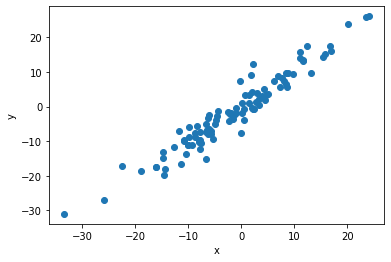

In [13]:
X = torch.randn(100, 1)*10
# below we add a noise
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [14]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))
print(model)

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [15]:
[w, b] = model.parameters()
# item() fuction change weight and bias to python value
def get_params():
    return(w[0][0].item(), b[0].item())

In [16]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

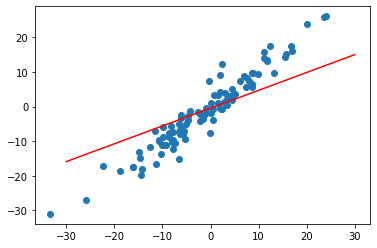

In [17]:
plot_fit('Initial Model')

# Loss Function and Gradient Descent and Mean Squared Error (MSE)
MSE for our function below:
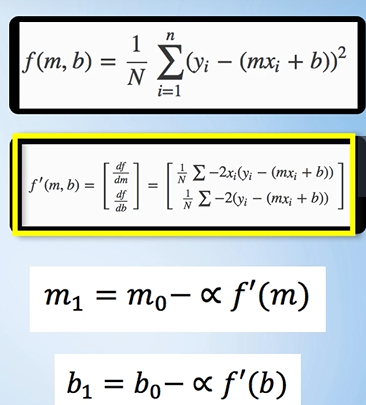

In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [19]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
  
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch: 0 loss: 36.448333740234375
epoch: 1 loss: 43.94552230834961
epoch: 2 loss: 53.461822509765625
epoch: 3 loss: 65.5404281616211
epoch: 4 loss: 80.87049865722656
epoch: 5 loss: 100.32696533203125
epoch: 6 loss: 125.01981353759766
epoch: 7 loss: 156.3577880859375
epoch: 8 loss: 196.12875366210938
epoch: 9 loss: 246.60142517089844
epoch: 10 loss: 310.6552429199219
epoch: 11 loss: 391.9435119628906
epoch: 12 loss: 495.1043395996094
epoch: 13 loss: 626.021240234375
epoch: 14 loss: 792.162109375
epoch: 15 loss: 1003.0047607421875
epoch: 16 loss: 1270.573974609375
epoch: 17 loss: 1610.131591796875
epoch: 18 loss: 2041.0472412109375
epoch: 19 loss: 2587.899169921875
epoch: 20 loss: 3281.88427734375
epoch: 21 loss: 4162.58251953125
epoch: 22 loss: 5280.22607421875
epoch: 23 loss: 6698.56982421875
epoch: 24 loss: 8498.5029296875
epoch: 25 loss: 10782.7236328125
epoch: 26 loss: 13681.5
epoch: 27 loss: 17360.189453125
epoch: 28 loss: 22028.619140625
epoch: 29 loss: 27953.029296875
epoch: 30 l

Text(0.5, 0, 'Epoch')

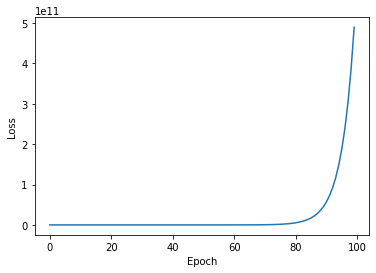

In [20]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

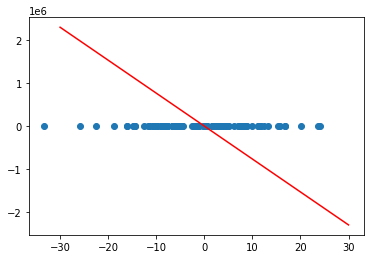

In [21]:
plot_fit("Trained Model")